In [8]:
"""
Walmart Sales Analysis & Forecasting Project

This advanced Python script performs:
  • Data Loading, Cleaning, and Feature Engineering
  • Exploratory Data Analysis (EDA) with visualizations
  • Unsupervised Learning: Customer segmentation using K-Means and PCA
  • Regression Modeling: Predicting actual_demand using multiple algorithms
  • Classification Modeling: Predicting stockout_indicator
"""

'\nWalmart Sales Analysis & Forecasting Project\nCandidate Number/SRN: [YOUR_CANDIDATE_OR_SRN_HERE]\n\nThis advanced Python script performs:\n  • Data Loading, Cleaning, and Feature Engineering\n  • Exploratory Data Analysis (EDA) with visualizations\n  • Unsupervised Learning: Customer segmentation using K-Means and PCA\n  • Regression Modeling: Predicting actual_demand using multiple algorithms\n  • Classification Modeling: Predicting stockout_indicator\n'

In [101]:
# =============================================================================
# IMPORT LIBRARIES AND SETUP LOGGING
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Machine Learning & Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (mean_squared_error, r2_score, accuracy_score,
                             confusion_matrix, classification_report, silhouette_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Hierarchical Clustering
import scipy.cluster.hierarchy as sch

In [6]:
# =============================================================================
# DATA LOADING & CLEANING
# =============================================================================
data_url = '/content/Walmart.csv'
data = pd.read_csv(data_url, parse_dates=['transaction_date'])

In [103]:
# Inspection of the dataset structure
print("Data Info:")
print(data.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          5000 non-null   int64         
 1   customer_id             5000 non-null   int64         
 2   product_id              5000 non-null   int64         
 3   product_name            5000 non-null   object        
 4   category                5000 non-null   object        
 5   quantity_sold           5000 non-null   int64         
 6   unit_price              5000 non-null   float64       
 7   transaction_date        5000 non-null   datetime64[ns]
 8   store_id                5000 non-null   int64         
 9   store_location          5000 non-null   object        
 10  inventory_level         5000 non-null   int64         
 11  reorder_point           5000 non-null   int64         
 12  reorder_quantity        5000 non-null

In [104]:
# Look at portion of the data
print("\nData Head:")
print(data.head())



Data Head:
   transaction_id  customer_id  product_id product_name     category  \
0               1         2824         843       Fridge  Electronics   
1               2         1409         135           TV  Electronics   
2               3         5506         391       Fridge  Electronics   
3               4         5012         710   Smartphone  Electronics   
4               5         4657         116       Laptop  Electronics   

   quantity_sold  unit_price    transaction_date  store_id   store_location  \
0              3      188.46 2024-03-31 21:46:00         3        Miami, FL   
1              4     1912.04 2024-07-28 12:45:00         5       Dallas, TX   
2              4     1377.75 2024-06-10 04:55:00         1  Los Angeles, CA   
3              5      182.31 2024-08-15 01:03:00         5        Miami, FL   
4              3      499.28 2024-09-13 00:45:00         6      Chicago, IL   

   ...  customer_loyalty_level  payment_method  promotion_applied  \
0  ...     

In [7]:
demand_df = data[['actual_demand', 'forecasted_demand']]
display(demand_df)

,actual_demand,forecasted_demand
0,179,172
1,484,109
2,416,289
3,446,174
4,469,287
...,...,...
4995,294,257
4996,397,388
4997,204,314
4998,144,488


from matplotlib import pyplot as plt
demand_df['actual_demand'].plot(kind='hist', bins=20, title='actual_demand')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
demand_df['forecasted_demand'].plot(kind='hist', bins=20, title='forecasted_demand')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
demand_df.plot(kind='scatter', x='actual_demand', y='forecasted_demand', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
demand_df['actual_demand'].plot(kind='line', figsize=(8, 4), title='actual_demand')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
demand_df['forecasted_demand'].plot(kind='line', figsize=(8, 4), title='forecasted_demand')
plt.gca().spines[['top', 'right']].set_visible(False)

In [105]:
# Check for missing values and duplicates
print("\nMissing values per column:")
print(data.isnull().sum())
print("\n")
print("\nNumber of duplicate rows:", data.duplicated().sum())


Missing values per column:
transaction_id               0
customer_id                  0
product_id                   0
product_name                 0
category                     0
quantity_sold                0
unit_price                   0
transaction_date             0
store_id                     0
store_location               0
inventory_level              0
reorder_point                0
reorder_quantity             0
supplier_id                  0
supplier_lead_time           0
customer_age                 0
customer_gender              0
customer_income              0
customer_loyalty_level       0
payment_method               0
promotion_applied            0
promotion_type            3407
weather_conditions           0
holiday_indicator            0
weekday                      0
stockout_indicator           0
forecasted_demand            0
actual_demand                0
dtype: int64



Number of duplicate rows: 0


In [106]:
# Drop missing values
data.dropna(subset=['promotion_type'], inplace=True)

# Check missing values (after cleaning)
print("\nMissing values per column (After cleaning):")
print(data.isnull().sum())


Missing values per column (After cleaning):
transaction_id            0
customer_id               0
product_id                0
product_name              0
category                  0
quantity_sold             0
unit_price                0
transaction_date          0
store_id                  0
store_location            0
inventory_level           0
reorder_point             0
reorder_quantity          0
supplier_id               0
supplier_lead_time        0
customer_age              0
customer_gender           0
customer_income           0
customer_loyalty_level    0
payment_method            0
promotion_applied         0
promotion_type            0
weather_conditions        0
holiday_indicator         0
weekday                   0
stockout_indicator        0
forecasted_demand         0
actual_demand             0
dtype: int64


In [107]:
# =============================================================================
# FEATURE ENGINEERING
# =============================================================================
# Create a new feature 'revenue'
data['revenue'] = data['quantity_sold'] * data['unit_price']

# Convert Boolean columns to numeric (if needed) for modeling
data['promotion_applied_num'] = data['promotion_applied'].astype(int)
data['holiday_indicator_num'] = data['holiday_indicator'].astype(int)
data['stockout_num'] = data['stockout_indicator'].astype(int)

# Extract year, month, day, and hour from the 'transaction_date' column
data['year'] = data['transaction_date'].dt.year
data['month'] = data['transaction_date'].dt.month
data['day'] = data['transaction_date'].dt.day
data['hour'] = data['transaction_date'].dt.hour


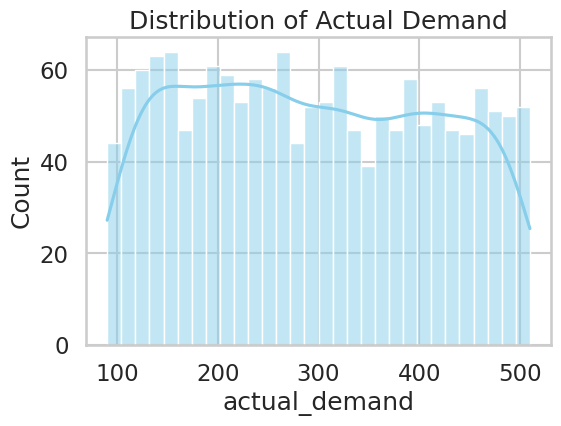

In [109]:
    plt.figure(figsize=(6,4))
    sns.histplot(data['actual_demand'], bins=30, kde=True, color='skyblue')
    plt.title("Distribution of Actual Demand")
    plt.show()

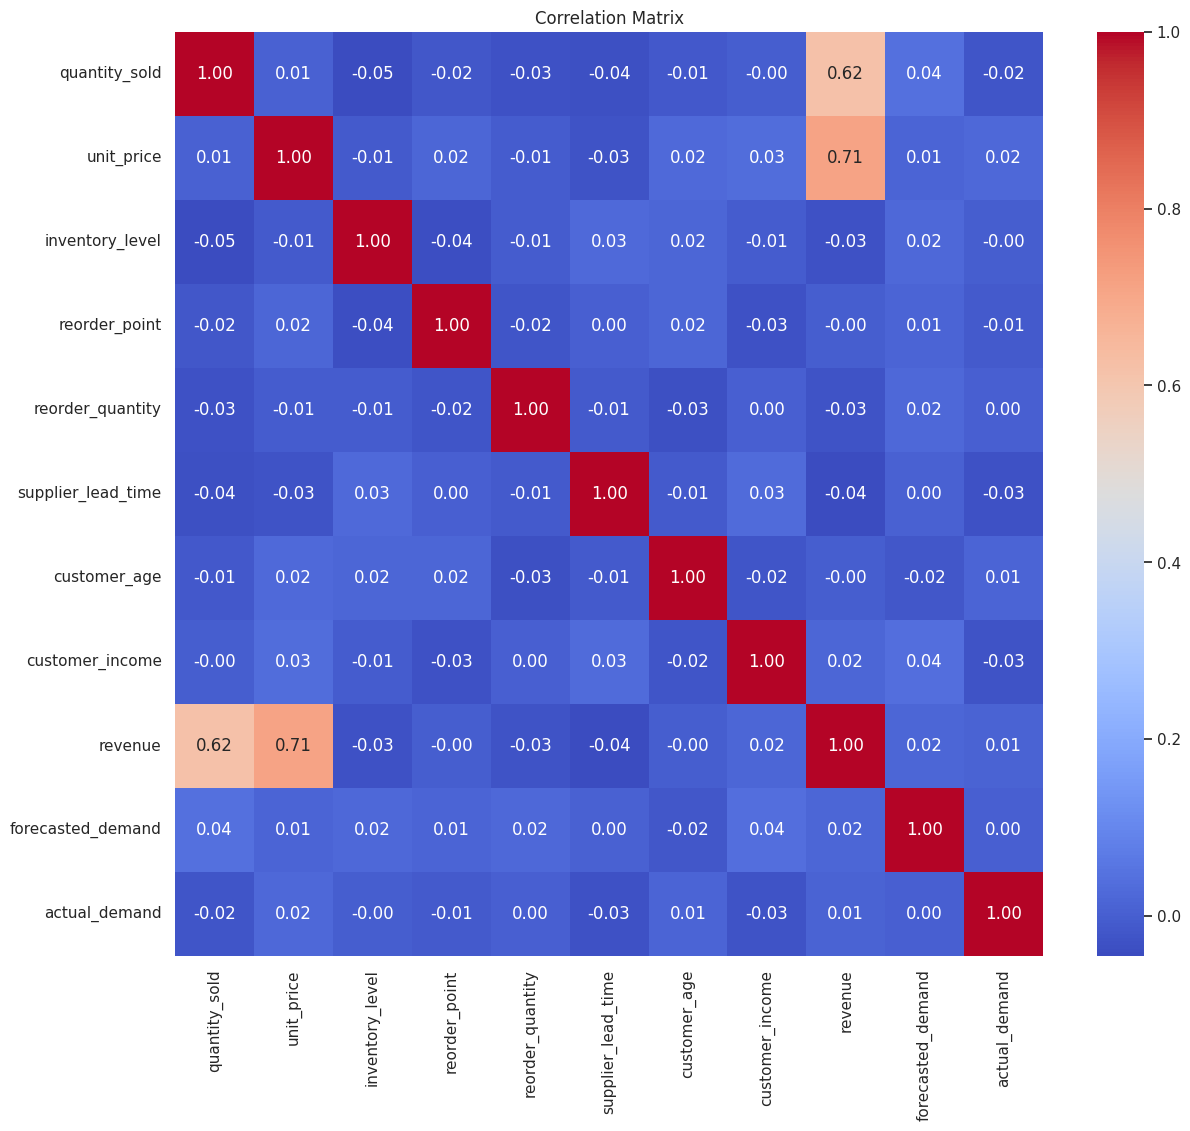

In [40]:
# =============================================================================
# EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================

# -----------------------------
# 1. Correlation Matrix for selected numerical features
# -----------------------------
numeric_cols = ['quantity_sold', 'unit_price', 'inventory_level', 'reorder_point',
                'reorder_quantity', 'supplier_lead_time', 'customer_age', 'customer_income',
                'revenue', 'forecasted_demand', 'actual_demand']
plt.figure(figsize=(14,12))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [79]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --------------------------------
# Actual Demand Statistics
# --------------------------------
actual_demand = data['actual_demand']
min_ad    = np.min(actual_demand)
q1_ad     = np.percentile(actual_demand, 25)
median_ad = np.median(actual_demand)
q3_ad     = np.percentile(actual_demand, 75)
max_ad    = np.max(actual_demand)

# Print statistics for Actual Demand
print("Actual Demand Statistics:")
print(f"Min: {min_ad:.2f}")
print(f"Q1: {q1_ad:.2f}")
print(f"Median: {median_ad:.2f}")
print(f"Q3: {q3_ad:.2f}")
print(f"Max: {max_ad:.2f}")

# Define hover text for Actual Demand invisible markers
hover_text_ad = [
    f"Min: {min_ad:.2f}",
    f"Q1: {q1_ad:.2f}",
    f"Median: {median_ad:.2f}",
    f"Q3: {q3_ad:.2f}",
    f"Max: {max_ad:.2f}"
]

# --------------------------------
# Revenue Statistics
# --------------------------------
revenue = data['revenue']
min_rev    = np.min(revenue)
q1_rev     = np.percentile(revenue, 25)
median_rev = np.median(revenue)
q3_rev     = np.percentile(revenue, 75)
max_rev    = np.max(revenue)

# Print statistics for Revenue
print("\nRevenue Statistics:")
print(f"Min: {min_rev:.2f}")
print(f"Q1: {q1_rev:.2f}")
print(f"Median: {median_rev:.2f}")
print(f"Q3: {q3_rev:.2f}")
print(f"Max: {max_rev:.2f}")

hover_text_rev = [
    f"Min: {min_rev:.2f}",
    f"Q1: {q1_rev:.2f}",
    f"Median: {median_rev:.2f}",
    f"Q3: {q3_rev:.2f}",
    f"Max: {max_rev:.2f}"
]

# --------------------------------
# Create Side-by-Side Boxplots with Individual y-axis Scales
# --------------------------------
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Distribution of Actual Demand", "Distribution of Revenue"),
    shared_yaxes=False  # Each subplot gets its own y-axis scale
)

# Add the Actual Demand box plot without hover info
fig.add_trace(go.Box(
    y=actual_demand,
    name="Actual Demand",
    boxpoints=False,       # Do not show individual points
    marker_color='royalblue',
    hoverinfo="skip"       # Disable default hover info on the box itself
), row=1, col=1)

# Add invisible markers for Actual Demand at min, Q1, median, Q3, and max
fig.add_trace(go.Scatter(
    x=["Actual Demand"] * 5,  # Category name repeated for each marker
    y=[min_ad, q1_ad, median_ad, q3_ad, max_ad],
    mode='markers',
    marker=dict(
        color='rgba(0,0,0,0)',  # Fully transparent markers
        size=20               # Large enough to capture hover events
    ),
    hoverinfo='text',
    text=hover_text_ad
), row=1, col=1)

# Add the Revenue box plot without hover info
fig.add_trace(go.Box(
    y=revenue,
    name="Revenue",
    boxpoints=False,
    marker_color='darkorange',
    hoverinfo="skip"
), row=1, col=2)

# Add invisible markers for Revenue at min, Q1, median, Q3, and max
fig.add_trace(go.Scatter(
    x=["Revenue"] * 5,
    y=[min_rev, q1_rev, median_rev, q3_rev, max_rev],
    mode='markers',
    marker=dict(
        color='rgba(0,0,0,0)',
        size=20
    ),
    hoverinfo='text',
    text=hover_text_rev
), row=1, col=2)

# Update layout for a professional look with centered overall title
fig.update_layout(
    title={"text": "Boxplots of Actual Demand and Revenue", "x": 0.5},
    template="plotly_white",
    font=dict(family="Arial", size=12),
    showlegend=False
)

# Set individual y-axis titles for each subplot
fig.update_yaxes(title_text="Actual Demand", row=1, col=1)
fig.update_yaxes(title_text="Revenue", row=1, col=2)

fig.show()


Actual Demand Statistics:
Min: 90.00
Q1: 189.00
Median: 290.00
Q3: 399.00
Max: 510.00

Revenue Statistics:
Min: 74.95
Q1: 1186.72
Median: 2441.56
Q3: 4587.06
Max: 9930.30


In [81]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Compute daily revenue sums
daily_revenue = data.groupby(data['transaction_date'].dt.date)['revenue'].sum().reset_index()
daily_revenue.columns = ['transaction_date', 'total_revenue']
# Ensure the date column is datetime type for proper plotting
daily_revenue['transaction_date'] = pd.to_datetime(daily_revenue['transaction_date'])

# Determine marker color based on revenue increase:
# - If today's revenue is greater than the previous day's, mark green; otherwise, mark light red.
marker_colors = []
for i in range(len(daily_revenue)):
    if i == 0:
        marker_colors.append('green')  # default for the first point
    else:
        if daily_revenue['total_revenue'].iloc[i] > daily_revenue['total_revenue'].iloc[i-1]:
            marker_colors.append('green')
        else:
            marker_colors.append('#c2305c')

# Create the interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=daily_revenue['transaction_date'],
    y=daily_revenue['total_revenue'],
    mode='lines+markers',
    line=dict(color='#40517d'),
    marker=dict(color=marker_colors, size=10),
    hovertemplate='Date: %{x|%Y-%m-%d}<br>Total Revenue: %{y:,}<extra></extra>',
))

# Update layout with centered title and axis formatting
fig.update_layout(
    title={'text': "Daily Revenue Over Time", 'x': 0.5},
    xaxis_title="Date",
    yaxis_title="Total Revenue",
    template="plotly_white",
    font=dict(family="Arial", size=12)
)

# Format y-axis tick labels with thousands separator
fig.update_yaxes(tickformat=",")

fig.show()


In [88]:
# -----------------------------
# 4. Bar plot: Transaction Count by Store
# -----------------------------
import numpy as np
import plotly.graph_objects as go
from plotly.colors import sample_colorscale

# --------------------------------
# Store Transaction Counts
# --------------------------------
store_counts = data['store_id'].value_counts().reset_index()
store_counts.columns = ['store_id', 'transaction_count']
store_counts.sort_values(by='store_id', inplace=True)

# Print out each store's transaction count before plotting
print("Transaction Count by Store:")
for idx, row in store_counts.iterrows():
    print(f"Store ID: {row['store_id']} | Transaction Count: {row['transaction_count']}")

# Generate colors from the Viridis colorscale
n = len(store_counts)
color_values = [i / (n - 1) if n > 1 else 0 for i in range(n)]
colors = sample_colorscale('viridis', color_values)

# --------------------------------
# Create Interactive Bar Chart
# --------------------------------
fig = go.Figure()

fig.add_trace(go.Bar(
    x=store_counts['store_id'].astype(str),  # ensure store IDs are strings
    y=store_counts['transaction_count'],
    marker_color=colors,
    textposition='inside',
    hovertemplate="Store ID: %{x}<br>Transaction Count: %{y}<extra></extra>"
))

# Update layout with a centered title and professional styling
fig.update_layout(
    title={"text": "Transaction Count by Store", "x": 0.5},
    xaxis_title="Store ID",
    yaxis_title="Transaction Count",
    template="plotly_white",
    font=dict(family="Arial", size=12)
)

fig.show()


Transaction Count by Store:
Store ID: 1 | Transaction Count: 79
Store ID: 2 | Transaction Count: 92
Store ID: 3 | Transaction Count: 77
Store ID: 4 | Transaction Count: 65
Store ID: 5 | Transaction Count: 84
Store ID: 6 | Transaction Count: 61
Store ID: 7 | Transaction Count: 90
Store ID: 8 | Transaction Count: 92
Store ID: 9 | Transaction Count: 81
Store ID: 10 | Transaction Count: 75
Store ID: 11 | Transaction Count: 92
Store ID: 12 | Transaction Count: 70
Store ID: 13 | Transaction Count: 74
Store ID: 14 | Transaction Count: 75
Store ID: 15 | Transaction Count: 88
Store ID: 16 | Transaction Count: 69
Store ID: 17 | Transaction Count: 78
Store ID: 18 | Transaction Count: 78
Store ID: 19 | Transaction Count: 94
Store ID: 20 | Transaction Count: 79


In [99]:
# =============================================================================
# 4. SUPERVISED LEARNING: REGRESSION (PREDICTING ACTUAL DEMAND)
# =============================================================================
# Use selected features (including numeric and binary columns)

# Define regression features
reg_features = [
    'quantity_sold',
    'forecasted_demand',      # Likely strong correlation with actual_demand
    'inventory_level',
    'promotion_applied_int',
    'holiday_indicator_int',
    'store_id',
]
X_reg = data[reg_features].copy()
y_reg = data['actual_demand'].copy()

# Drop rows where 'actual_demand' or key features might be missing
X_reg = X_reg.dropna()
y_reg = y_reg.loc[X_reg.index]

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=2024
)

# Scale features for linear-based models
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

In [100]:
# -----------------------------
# 1. Linear Regression
# -----------------------------
lr = LinearRegression()
lr.fit(X_train_reg_scaled, y_train_reg)
y_pred_lr = lr.predict(X_test_reg_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))
r2_lr = r2_score(y_test_reg, y_pred_lr)
print("Linear Regression: RMSE = {:.2f}, R2 = {:.2f}".format(rmse_lr, r2_lr))

Linear Regression: RMSE = 122.00, R2 = -0.02


In [95]:
# -----------------------------
# 2. Ridge Regression with Cross-Validation
# -----------------------------
ridge = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge.fit(X_train_reg_scaled, y_train_reg)
y_pred_ridge = ridge.predict(X_test_reg_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_test_reg, y_pred_ridge))
r2_ridge = r2_score(y_test_reg, y_pred_ridge)
print("Ridge Regression: RMSE = {:.2f}, R2 = {:.2f}".format(rmse_ridge, r2_ridge))

Ridge Regression: RMSE = 120.24, R2 = -0.01


In [112]:
# -----------------------------
# 3. Lasso Regression with Cross-Validation
# -----------------------------
lasso = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5, random_state=2024)
lasso.fit(X_train_reg_scaled, y_train_reg)
y_pred_lasso = lasso.predict(X_test_reg_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_test_reg, y_pred_lasso))
r2_lasso = r2_score(y_test_reg, y_pred_lasso)
print("Lasso Regression: RMSE = {:.2f}, R2 = {:.2f}".format(rmse_lasso, r2_lasso))

Lasso Regression: RMSE = 121.12, R2 = -0.00


In [113]:
# -----------------------------
# 4. Decision Tree Regression
# -----------------------------
dt_reg = DecisionTreeRegressor(random_state=2024)
dt_reg.fit(X_train_reg, y_train_reg)  # Trees do not require scaling
y_pred_dt = dt_reg.predict(X_test_reg)
rmse_dt = np.sqrt(mean_squared_error(y_test_reg, y_pred_dt))
r2_dt = r2_score(y_test_reg, y_pred_dt)
print("Decision Tree Regression: RMSE = {:.2f}, R2 = {:.2f}".format(rmse_dt, r2_dt))

Decision Tree Regression: RMSE = 182.00, R2 = -1.27


In [114]:
# -----------------------------
# 5. Random Forest Regression
# -----------------------------
rf_reg = RandomForestRegressor(n_estimators=500, random_state=2024)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
r2_rf = r2_score(y_test_reg, y_pred_rf)
print("Random Forest Regression: RMSE = {:.2f}, R2 = {:.2f}".format(rmse_rf, r2_rf))

Random Forest Regression: RMSE = 126.30, R2 = -0.09


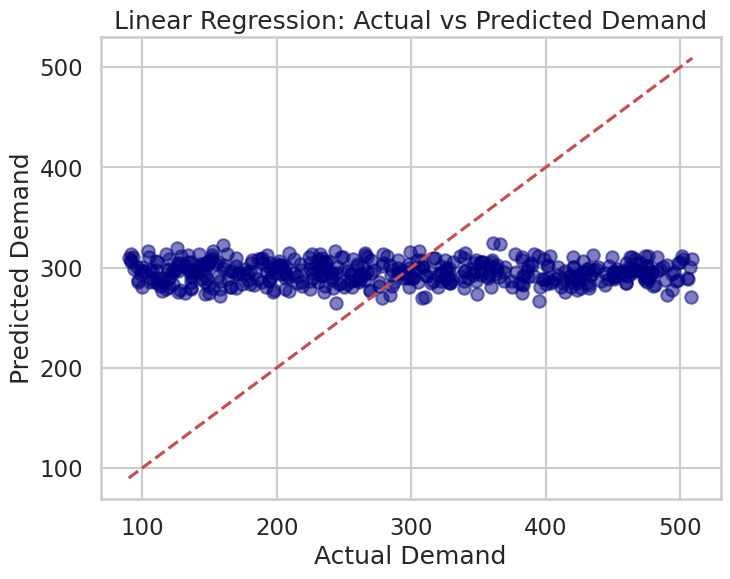

In [115]:
# -----------------------------
# 6. Plot: Actual vs Predicted (Linear Regression Example)
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_lr, alpha=0.5, color='navy')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Linear Regression: Actual vs Predicted Demand")
plt.show()

In [122]:
# =============================================================================
# 5. SUPERVISED LEARNING : CLASSIFICATION (PREDICTING STOCKOUT INDICATOR)
# =============================================================================
# Use a subset of features believed to affect stockout events

classif_features = ['store_id', 'quantity_sold', 'unit_price', 'inventory_level',
                    'promotion_applied_num', 'holiday_indicator_num', 'weather_conditions',
                    'forecasted_demand']
X_class = data[classif_features]
y_class = data['stockout_num']  # binary target: 0 (no stockout) or 1 (stockout)

# Split into training and testing sets (80% Training 20% Testing)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_class, y_class,
                                                                    test_size=0.2, random_state=2024)

# ----> 1. Encode 'weather_conditions' before scaling:
encoder = LabelEncoder()
X_train_clf['weather_conditions_encoded'] = encoder.fit_transform(X_train_clf['weather_conditions'])
X_test_clf['weather_conditions_encoded'] = encoder.transform(X_test_clf['weather_conditions'])

# ----> 2. Update classif_features to use the encoded column:
classif_features = ['store_id', 'quantity_sold', 'unit_price', 'inventory_level',
                    'promotion_applied_num', 'holiday_indicator_num', 'weather_conditions_encoded',
                    'forecasted_demand']

# ----> 3. Select features for scaling (excluding the original 'weather_conditions'):
X_train_clf_scaled = X_train_clf[classif_features]
X_test_clf_scaled = X_test_clf[classif_features]


# Scale features for models sensitive to feature scales (e.g., Logistic Regression, SVM, KNN)
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf_scaled)  # Scale the selected features
X_test_clf_scaled = scaler_clf.transform(X_test_clf_scaled)       # Scale using the same scaler

In [123]:
# -----------------------------
# 1. Logistic Regression
# -----------------------------
log_reg = LogisticRegression(max_iter=1000, random_state=2024)
log_reg.fit(X_train_clf_scaled, y_train_clf)
y_pred_log = log_reg.predict(X_test_clf_scaled)
acc_log = accuracy_score(y_test_clf, y_pred_log)
print("\nLogistic Regression Accuracy: {:.2f}%".format(acc_log * 100))
print(confusion_matrix(y_test_clf, y_pred_log))
print(classification_report(y_test_clf, y_pred_log))


Logistic Regression Accuracy: 52.04%
[[ 62 100]
 [ 53 104]]
              precision    recall  f1-score   support

           0       0.54      0.38      0.45       162
           1       0.51      0.66      0.58       157

    accuracy                           0.52       319
   macro avg       0.52      0.52      0.51       319
weighted avg       0.52      0.52      0.51       319



In [124]:
# -----------------------------
# 2. Support Vector Machine (SVM)
# -----------------------------
svm_clf = SVC(kernel='rbf', random_state=2024)
svm_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_svm = svm_clf.predict(X_test_clf_scaled)
acc_svm = accuracy_score(y_test_clf, y_pred_svm)
print("SVM Accuracy: {:.2f}%".format(acc_svm * 100))
print(confusion_matrix(y_test_clf, y_pred_svm))
print(classification_report(y_test_clf, y_pred_svm))

SVM Accuracy: 47.96%
[[ 52 110]
 [ 56 101]]
              precision    recall  f1-score   support

           0       0.48      0.32      0.39       162
           1       0.48      0.64      0.55       157

    accuracy                           0.48       319
   macro avg       0.48      0.48      0.47       319
weighted avg       0.48      0.48      0.47       319



In [128]:
# -----------------------------
# 3. Decision Tree Classifier
# -----------------------------
dt_clf = DecisionTreeClassifier(random_state=2024)
# Trees work fine without scaling, but require numerical features
# Use the scaled data with the encoded weather condition:
dt_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_dt_clf = dt_clf.predict(X_test_clf_scaled) # Predict using scaled data
acc_dt = accuracy_score(y_test_clf, y_pred_dt_clf)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(acc_dt * 100))
print(confusion_matrix(y_test_clf, y_pred_dt_clf))
print(classification_report(y_test_clf, y_pred_dt_clf))

Decision Tree Classifier Accuracy: 53.92%
[[77 85]
 [62 95]]
              precision    recall  f1-score   support

           0       0.55      0.48      0.51       162
           1       0.53      0.61      0.56       157

    accuracy                           0.54       319
   macro avg       0.54      0.54      0.54       319
weighted avg       0.54      0.54      0.54       319



In [129]:
# -----------------------------
# 4. K-Nearest Neighbors (KNN)
# -----------------------------
knn = KNeighborsClassifier(n_neighbors=8)  # k chosen as an example (sqrt(n) rule can be applied)
knn.fit(X_train_clf_scaled, y_train_clf)
y_pred_knn = knn.predict(X_test_clf_scaled)
acc_knn = accuracy_score(y_test_clf, y_pred_knn)
print("KNN Classifier Accuracy: {:.2f}%".format(acc_knn * 100))
print(confusion_matrix(y_test_clf, y_pred_knn))
print(classification_report(y_test_clf, y_pred_knn))

KNN Classifier Accuracy: 45.77%
[[ 98  64]
 [109  48]]
              precision    recall  f1-score   support

           0       0.47      0.60      0.53       162
           1       0.43      0.31      0.36       157

    accuracy                           0.46       319
   macro avg       0.45      0.46      0.44       319
weighted avg       0.45      0.46      0.45       319



In [131]:
# -----------------------------
# 5. Random Forest Classifier
# -----------------------------
rf_clf = RandomForestClassifier(n_estimators=500, random_state=2024)
rf_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf_scaled)
acc_rf = accuracy_score(y_test_clf, y_pred_rf_clf)
print("Random Forest Classifier Accuracy: {:.2f}%".format(acc_rf * 100))
print(confusion_matrix(y_test_clf, y_pred_rf_clf))
print(classification_report(y_test_clf, y_pred_rf_clf))

Random Forest Classifier Accuracy: 51.41%
[[67 95]
 [60 97]]
              precision    recall  f1-score   support

           0       0.53      0.41      0.46       162
           1       0.51      0.62      0.56       157

    accuracy                           0.51       319
   macro avg       0.52      0.52      0.51       319
weighted avg       0.52      0.51      0.51       319



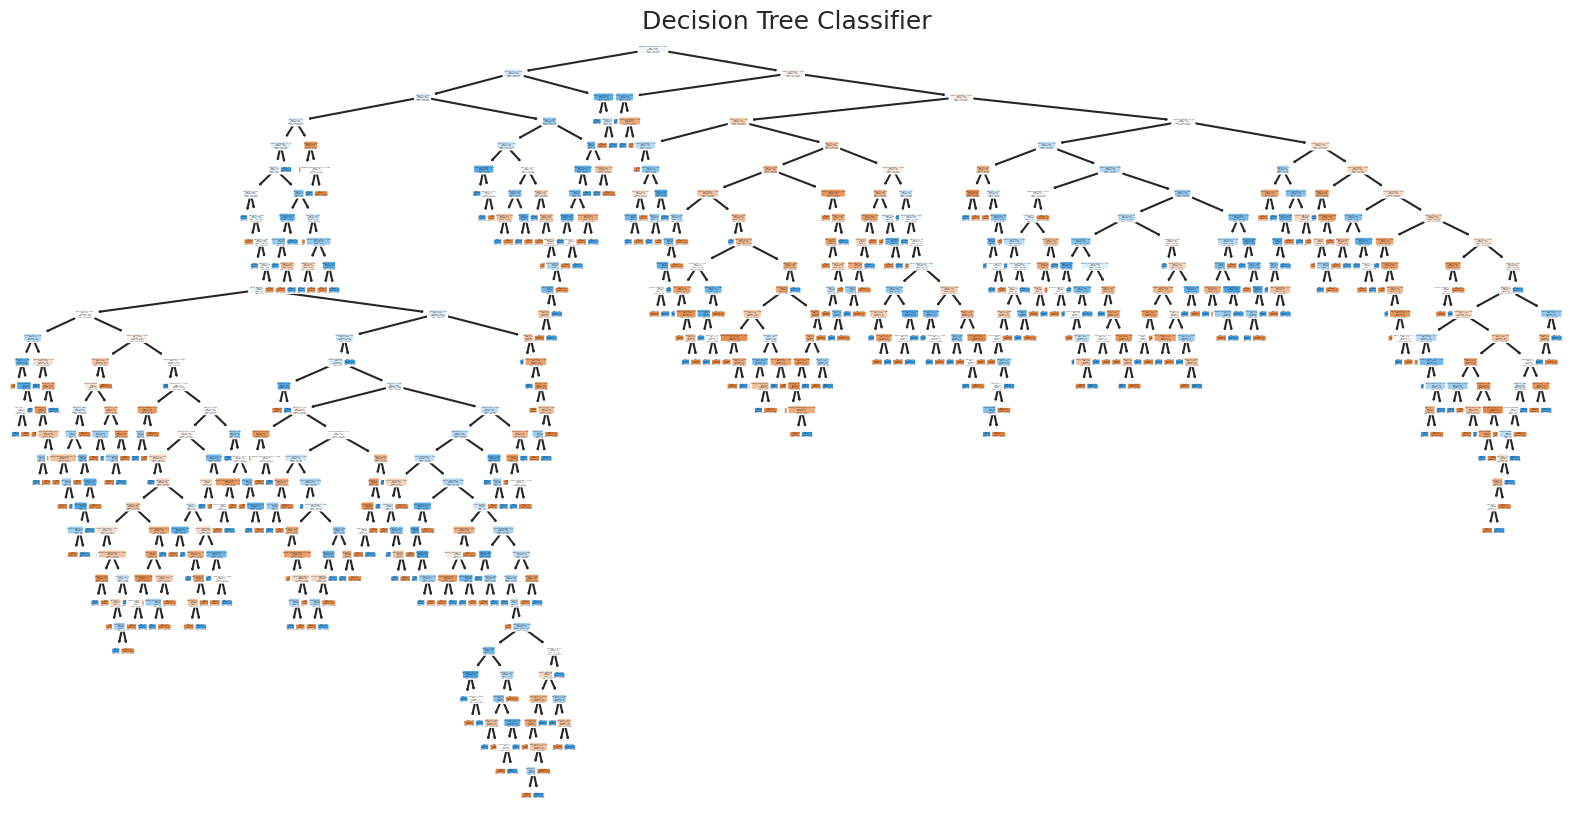

In [136]:
# -----------------------------
# 6. Plot Decision Tree (for classification)
# -----------------------------
plt.figure(figsize=(20,10))
plot_tree(dt_clf, filled=True, feature_names=classif_features,
          class_names=['No Stockout', 'Stockout'], rounded=True, fontsize=1)
plt.title("Decision Tree Classifier")
plt.show()


RFM Head:
   customer_id  Recency  Frequency  Monetary
0         1003      221          1    710.03
1         1006      215          1   6372.40
2         1017       44          1   3716.37
3         1023       66          1   3193.80
4         1025      257          1    959.32


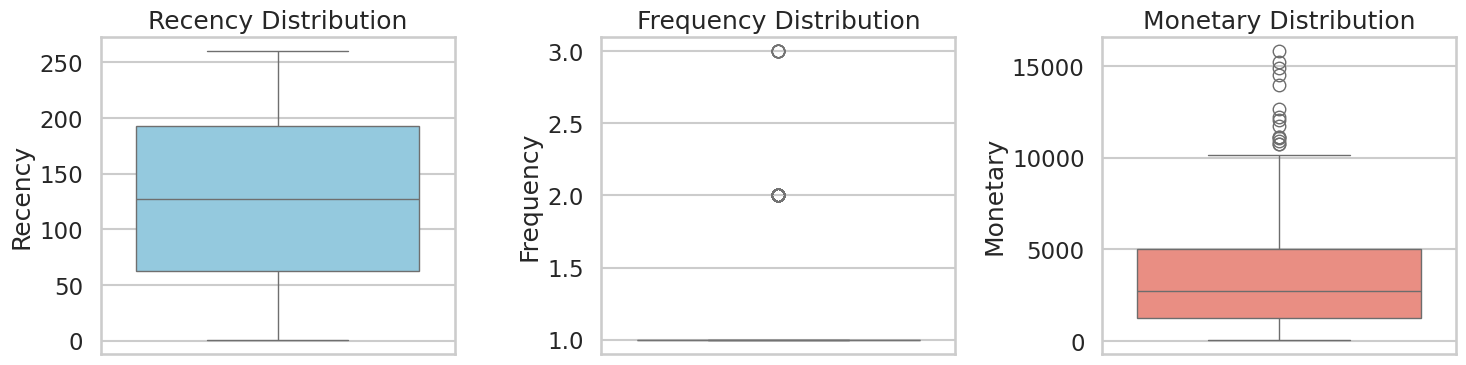

In [133]:
# =============================================================================
# 6. UNSUPERVISED LEARNING : FRM ANALYSIS and CLUSTERING
# =============================================================================
# RFM analysis is widely used in marketing/retail to segment customers.
# I compute Recency (days since last purchase), Frequency (number of transactions), and Monetary (total revenue) for each customer.

# Set snapshot date as one day after the last transaction date
snapshot_date = data['transaction_date'].max() + pd.Timedelta(days=1)

rfm = data.groupby('customer_id').agg({
    'transaction_date': lambda x: (snapshot_date - x.max()).days,
    'transaction_id': 'count',
    'revenue': 'sum'
}).reset_index()
rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']
print("\nRFM Head:")
print(rfm.head())

# Visualize the distribution of R(Recency), F(Frequency), and M(Monetary)
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(y=rfm['Recency'], color='skyblue')
plt.title("Recency Distribution")
plt.subplot(1,3,2)
sns.boxplot(y=rfm['Frequency'], color='lightgreen')
plt.title("Frequency Distribution")
plt.subplot(1,3,3)
sns.boxplot(y=rfm['Monetary'], color='salmon')
plt.title("Monetary Distribution")
plt.tight_layout()
plt.show()

# Scale the RFM features
scaler_rfm = StandardScaler()
rfm_scaled = scaler_rfm.fit_transform(rfm[['Recency','Frequency','Monetary']])


In [134]:
# -----------------------------
# 1. Principal Component Analysis (PCA)
# -----------------------------
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
print("Explained Variance Ratio (PCA):", pca.explained_variance_ratio_)

# Create a DataFrame with PCA results for visualization
rfm_pca_df = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'])
rfm_pca_df['customer_id'] = rfm['customer_id']

Explained Variance Ratio (PCA): [0.46802399 0.31352191]


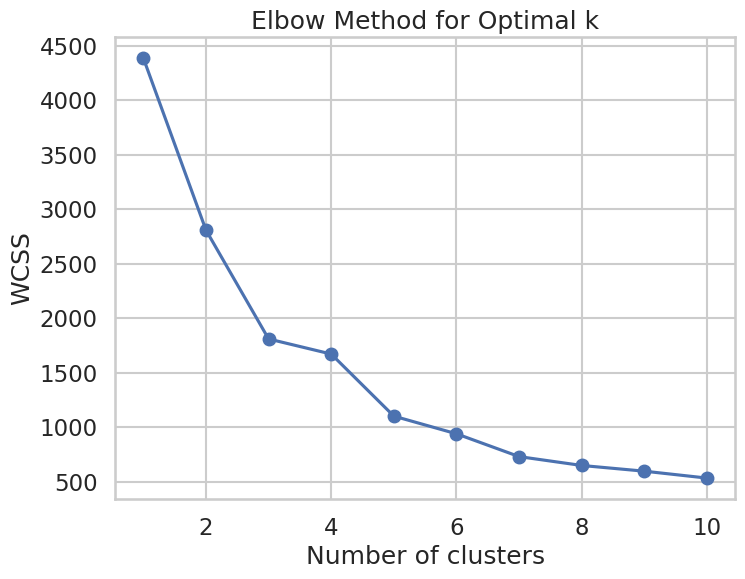

In [135]:
# -----------------------------
# 6.2. K-Means Clustering
# -----------------------------
# Use the Elbow Method to help decide the optimal number of clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=2024)
    km.fit(rfm_scaled)
    wcss.append(km.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


RFM with Cluster Assignment (head):
   customer_id  Recency  Frequency  Monetary  Cluster
0         1003      221          1    710.03        0
1         1006      215          1   6372.40        0
2         1017       44          1   3716.37        2
3         1023       66          1   3193.80        2
4         1025      257          1    959.32        0
Silhouette Score for k=4: 0.38455359907605163


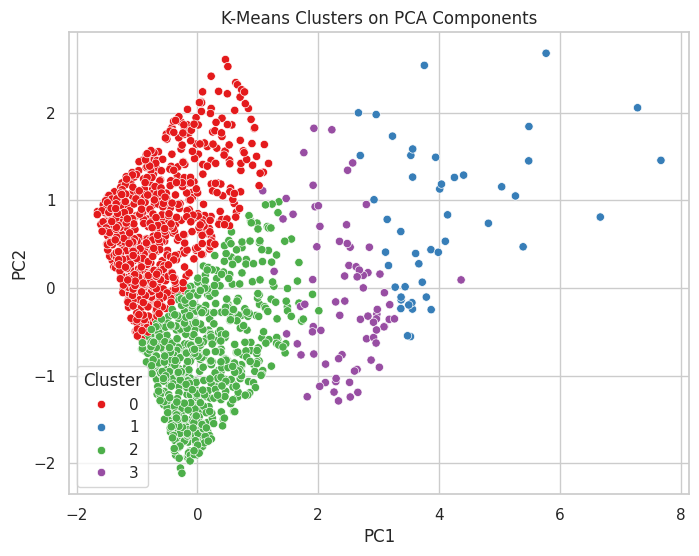

In [34]:
# The optimal K is k=4.
kmeans = KMeans(n_clusters=4, random_state=2024)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
print("\nRFM with Cluster Assignment (head):")
print(rfm.head())

# Calculate and print the silhouette score
sil_score = silhouette_score(rfm_scaled, rfm['Cluster'])
print("Silhouette Score for k=4:", sil_score)

# Visualize clusters on the PCA plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=rfm_pca_df['PC1'], y=rfm_pca_df['PC2'], hue=rfm['Cluster'], palette='Set1')
plt.title("K-Means Clusters on PCA Components")
plt.show()

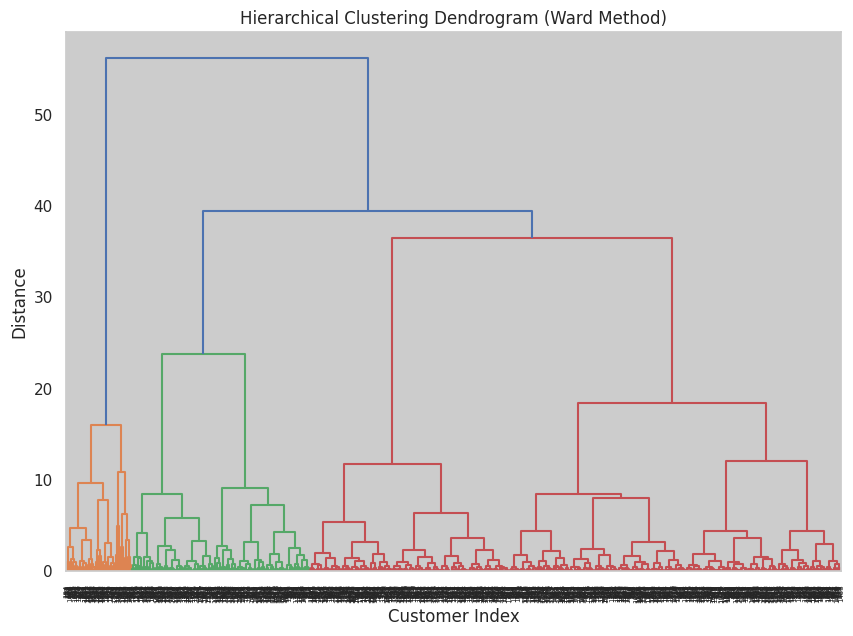


Cluster Summary:
   Cluster     Recency  Frequency     Monetary  Count
0        0  195.959479   1.000000  3094.631418    691
1        1   71.361702   2.127660  9455.628723     47
2        2   65.942813   1.000000  3176.482952    647
3        3   87.051948   2.012987  3866.869740     77


In [35]:
# -----------------------------
# 6.3. Hierarchical Clustering & Dendrogram
# -----------------------------
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram (Ward Method)")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()

# Summarize cluster characteristics
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'Count'}).reset_index()
print("\nCluster Summary:")
print(cluster_summary)